In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [4]:
#funcion para determinar el D80 de un set de datos de análisis granulométrico
def D80(set_datos, peso_procesado):
    # lectura de datos
    data = pd.read_csv(f'../data/{set_datos}')
    Pesos_cada_malla_temp = list(data.loc[:, 'Peso'])
    data_add = {'Mesh':'-400', 'Particle size':15, 'Peso': peso_procesado - sum(Pesos_cada_malla_temp) }
    data.loc[-1]=data_add
    Particle_size = list(data.loc[:, 'Particle size'])
    Pesos_cada_malla = list(data.loc[:, 'Peso'])
    Alim_recalculada = sum(Pesos_cada_malla)
    Retenido_malla = [i / Alim_recalculada for i in Pesos_cada_malla]
    Retenido_Acumulado = [Retenido_malla[0]]
    for i in range(len(Retenido_malla) - 1):
        Retenido_Acumulado.append(Retenido_Acumulado[i] + Retenido_malla[i + 1])
    Pasado_acumulado = [1 - i for i in Retenido_Acumulado]
#    print(sorted(Pasado_acumulado))
#    print(sorted(Particle_size))
    Curva_interpolation = interp1d(sorted(Pasado_acumulado), sorted(Particle_size) )
    d80 = Curva_interpolation(0.8)
    # plt.plot(Particle_size, Pasado_acumulado)
    # pasado = np.linspace(0,1)
    # plt.plot(Curva_interpolation(pasado), pasado)
    # plt.show()
    return d80



In [7]:
print(D80('Grinding_data/P4/molienda_p4_105min.csv', 500))
print(D80('Gold_size/Datos_dp_P4.csv', 2000))

142.4777517564403
720.6433336379426


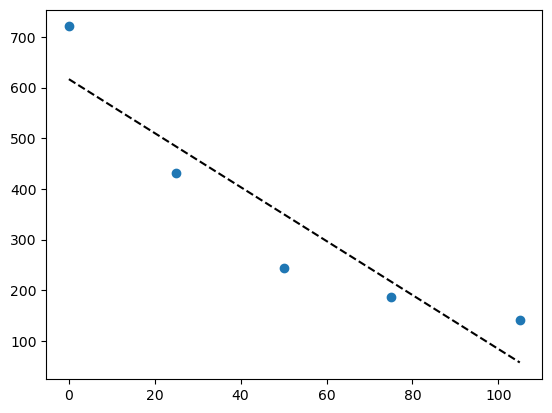

In [3]:
time = [25, 50, 75, 105]
datos = [D80('Malla_valorada_p4_datos.csv', 2000)]
for i in time:
    datos.append(D80('molienda_p4_{0:d}min.csv'.format(i),500))

fig = plt.figure()
ax = plt.axes()
time = [0, 25, 50, 75, 105]
ax.scatter(time, datos)
curva = linregress(time, [D80('Malla_valorada_p4_datos.csv', 2000), D80('molienda_p4_25min.csv', 500), D80('molienda_p4_50min.csv', 500), 
                         D80('molienda_p4_75min.csv', 500), D80('molienda_p4_105min.csv', 500)])
d80 = time*np.array(curva.slope) + np.array(curva.intercept)
# Graficar linea de tendencia
ax.plot(time, d80, '--', color= 'k')
plt.show()

In [4]:
print('Tamaño para alcanzar con 75 min de molienda: '+ str(75*np.array(curva.slope) + np.array(curva.intercept)))
print('R2: ' + str(curva.rvalue**2))

Tamaño para alcanzar con 75 min de molienda: 217.3965441538133
R2: 0.8532800618762448
